In [1]:
import sys
sys.path.append("..")
import numpy as np
from common.util import preprocess, create_co_matrix, cos_similarity, most_similar, ppmi

In [2]:
text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)

In [3]:
print(corpus)

[0 1 2 3 4 1 5 6]


In [4]:
print(id_to_word)

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [5]:
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size, window_size=1)

In [6]:
c0 = C[word_to_id["you"]]
c1 = C[word_to_id["i"]]
print(cos_similarity(c0, c1))

0.7071067758832467


In [7]:
c0 = C[word_to_id["you"]]
c1 = C[word_to_id["goodbye"]]
print(cos_similarity(c0, c1))

0.7071067758832467


In [8]:
most_similar("you", word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067758832467
 i: 0.7071067758832467
 hello: 0.7071067758832467
 say: 0.0
 and: 0.0


In [9]:
W = ppmi(C)
print(W)

[[0.        1.8073549 0.        0.        0.        0.        0.       ]
 [1.8073549 0.        0.8073549 0.        0.8073549 0.8073549 0.       ]
 [0.        0.8073549 0.        1.8073549 0.        0.        0.       ]
 [0.        0.        1.8073549 0.        1.8073549 0.        0.       ]
 [0.        0.8073549 0.        1.8073549 0.        0.        0.       ]
 [0.        0.8073549 0.        0.        0.        0.        2.807355 ]
 [0.        0.        0.        0.        0.        2.807355  0.       ]]


In [10]:
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi

In [11]:
# SVD
U, S, V = np.linalg.svd(W)

In [12]:
print(C[0])
print(W[0])
print(U[0, :2])

[0 1 0 0 0 0 0]
[0.        1.8073549 0.        0.        0.        0.        0.       ]
[ 3.4094876e-01 -1.1102230e-16]


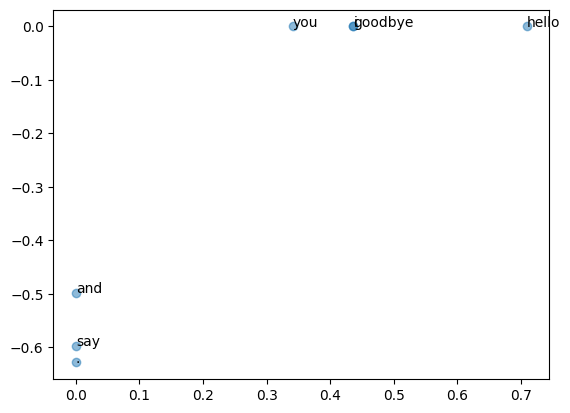

In [13]:
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
plt.scatter(U[:,0], U[:,1], alpha=0.5)


In [14]:
from dataset import ptb

In [16]:
window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data("train")
vocab_size = len(word_to_id)
print("counting co_occurrence ...")
C = create_co_matrix(corpus, vocab_size, window_size)
print("calculating PPMI ...")
W = ppmi(C)

print("calculation SVD ...")
try:
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5, random_state=None)
except ImportError:
    U, S, V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size]

querys = ["you", "year", "car", "toyota"]
for query in querys:
    most_similar(query, word_to_id, id_to_word, W, top=5)

counting co_occurrence ...
calculating PPMI ...


c:\Users\alser\Desktop\zero-deep-learning\zero_deep_learning2\notebook\..\common\util.py:76: RuntimeWarning: overflow encountered in scalar multiply
  pmi = np.log2(C[i, j] * N / (S[i] * S[j]) + eps)
c:\Users\alser\Desktop\zero-deep-learning\zero_deep_learning2\notebook\..\common\util.py:76: RuntimeWarning: invalid value encountered in log2
  pmi = np.log2(C[i, j] * N / (S[i] * S[j]) + eps)


calculation SVD ...

[query] you
 i: 0.26884013414382935
 we: 0.23437857627868652
 do: 0.2321992665529251
 n't: 0.19397474825382233
 they: 0.1898859143257141

[query] year
 last: 0.19465571641921997
 next: 0.1875421702861786
 quarter: 0.17653876543045044
 this: 0.17621073126792908
 <eos>: 0.15354439616203308

[query] car
 auto: 0.17230665683746338
 cars: 0.14961887896060944
 rental: 0.11934369802474976
 domestic: 0.1061287373304367
 competitiveness: 0.10278013348579407

[query] toyota
 lexus: 0.20103180408477783
 honda: 0.1939416527748108
 motor: 0.1769258975982666
 infiniti: 0.17500746250152588
 nissan: 0.1671632081270218
